In [2]:
import pandas as pd 
import numpy as np

In [3]:

df=pd.read_csv(r"D:\AlgoT\brokrage\finalbalance.csv")

In [4]:
df

,Unnamed: 0,CumReturns,Date,Daily Brokerage,Final Balance
0,0,0.0,2019-01-01,80,100000.0
1,1,0.0,2019-01-02,220,100000.0
2,2,0.0,2019-01-03,220,100000.0
3,3,0.0,2019-01-04,80,100000.0
4,4,0.0,2019-01-07,80,100000.0
...,...,...,...,...,...
1249,1249,1930.0,2023-12-22,140,694425.0
1250,1250,65.0,2023-12-26,80,694410.0
1251,1251,-1102.5,2023-12-27,80,693227.5
1252,1252,2322.5,2023-12-28,80,695470.0


In [5]:
# df.drop(columns=['Unnamed: 0'], inplace=True)
df['day'] = pd.to_datetime(df['Date']).dt.day_name()
# df.drop(columns=['Unnamed: 0.1'], inplace=True)

In [6]:
# create a new column for date 
df['date'] = pd.to_datetime(df['Date']).dt.date

In [7]:
df['date']= pd.to_datetime(df['date'])

In [8]:
initial = 100000

In [10]:
# group by date and sum the totalPL
daily_returns = df.groupby('date')['CumReturns'].sum().reset_index()

In [11]:
daily_returns.head(50)

,date,CumReturns
0,2019-01-01,0.0
1,2019-01-02,0.0
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-07,0.0
5,2019-01-08,0.0
6,2019-01-09,0.0
7,2019-01-10,0.0
8,2019-01-11,0.0
9,2019-01-14,0.0


In [12]:
daily_returns['balance'] = initial + daily_returns['CumReturns'].cumsum()

In [13]:
# drop rows where total pl is 0
# daily_returns = daily_returns[daily_returns['totalPL'] != 0]
daily_returns['totalPLcumsum'] = daily_returns['CumReturns'].cumsum()

In [14]:
#create pct_change column
daily_returns['pct_change'] = daily_returns['balance'].pct_change()


In [15]:
daily_returns

,date,CumReturns,balance,totalPLcumsum,pct_change
0,2019-01-01,0.0,100000.0,0.0,NaN
1,2019-01-02,0.0,100000.0,0.0,0.000000
2,2019-01-03,0.0,100000.0,0.0,0.000000
3,2019-01-04,0.0,100000.0,0.0,0.000000
4,2019-01-07,0.0,100000.0,0.0,0.000000
...,...,...,...,...,...
1228,2023-12-22,1930.0,841345.0,741345.0,0.002299
1229,2023-12-26,65.0,841410.0,741410.0,0.000077
1230,2023-12-27,-1102.5,840307.5,740307.5,-0.001310
1231,2023-12-28,2322.5,842630.0,742630.0,0.002764


In [16]:
daily_returns['date'] = daily_returns['date'].dt.to_pydatetime()

In [17]:
daily_returns['day'] = daily_returns['date'].dt.day_name()

In [18]:
# set index to date
daily_returns.set_index('date', inplace=True)

In [20]:
daily_returns

,CumReturns,balance,totalPLcumsum,pct_change,day
date,,,,,
2019-01-01,0.0,100000.0,0.0,NaN,Tuesday
2019-01-02,0.0,100000.0,0.0,0.000000,Wednesday
2019-01-03,0.0,100000.0,0.0,0.000000,Thursday
2019-01-04,0.0,100000.0,0.0,0.000000,Friday
2019-01-07,0.0,100000.0,0.0,0.000000,Monday
...,...,...,...,...,...
2023-12-22,1930.0,841345.0,741345.0,0.002299,Friday
2023-12-26,65.0,841410.0,741410.0,0.000077,Tuesday
2023-12-27,-1102.5,840307.5,740307.5,-0.001310,Wednesday


In [21]:
import pyfolio as pf

pf.create_full_tear_sheet(returns = daily_returns['pct_change'], benchmark_rets=None,)


d:\AlgoT\myenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
d:\AlgoT\myenv\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2019-01-01
End date,2023-12-29
Total months,58
,Backtest
Annual return,54.6%
Cumulative returns,742.0%
Annual volatility,11.8%
Sharpe ratio,3.75
Calmar ratio,4.82
Stability,0.90
Max drawdown,-11.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

<Axes: title={'center': 'Underwater plot'}, ylabel='Drawdown'>

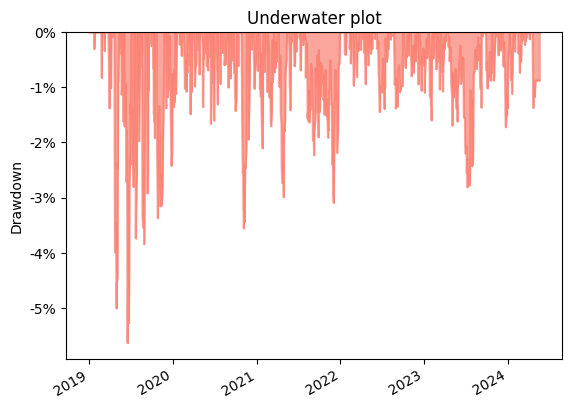

In [153]:
#plot drawdown underwater for both benchmark and returns
pf.plot_drawdown_underwater(returns = daily_returns['pct_change'])









In [40]:
daily_returns

,totalPL,balance,totalPLcumsum,pct_change,day
date,,,,,
2019-01-01,0.0,100000.0,0.0,NaN,Tuesday
2019-01-02,0.0,100000.0,0.0,0.0,Wednesday
2019-01-03,0.0,100000.0,0.0,0.0,Thursday
2019-01-04,0.0,100000.0,0.0,0.0,Friday
2019-01-07,0.0,100000.0,0.0,0.0,Monday
...,...,...,...,...,...
2024-05-13,0.0,586640.0,486640.0,0.0,Monday
2024-05-14,0.0,586640.0,486640.0,0.0,Tuesday
2024-05-15,0.0,586640.0,486640.0,0.0,Wednesday


In [112]:
import pandas as pd
import numpy as np
from itertools import groupby




# Convert date column to datetime
daily_returns['date'] = pd.to_datetime(daily_returns['date'])

# Total Trades
total_trades = len(daily_returns)

# Profitable Trades
profitable_trades = daily_returns[daily_returns['totalPL'] > 0]['totalPL'].count()

# Losing Trades
losing_trades = daily_returns[daily_returns['totalPL'] < 0]['totalPL'].count()

# Avg. Trades Per Month
avg_trades_per_month = daily_returns.resample('M', on='date')['totalPL'].count().mean()

# Helper function to calculate streaks with dates
def calculate_streaks(daily_returns, condition):
    streaks = []
    streak_start = None
    streak_length = 0

    for i, row in daily_returns.iterrows():
        if condition(row['totalPL']):
            if streak_length == 0:
                streak_start = row['date']
            streak_length += 1
        else:
            if streak_length > 0:
                streaks.append((streak_start, row['date'] - pd.Timedelta(days=1), streak_length))
            streak_length = 0

    if streak_length > 0:
        streaks.append((streak_start, row['date'], streak_length))

    return streaks

# Max Profitable Streak
profitable_streaks = calculate_streaks(daily_returns, lambda x: x > 0)
max_profitable_streak = max(profitable_streaks, key=lambda x: x[2], default=(None, None, 0))

# Max Losing Streak
losing_streaks = calculate_streaks(daily_returns, lambda x: x < 0)
max_losing_streak = max(losing_streaks, key=lambda x: x[2], default=(None, None, 0))

# Hit Ratio
hit_ratio = profitable_trades / total_trades if total_trades > 0 else 0

# Risk Reward
avg_profit_per_trade = daily_returns[daily_returns['totalPL'] > 0]['totalPL'].mean()
avg_loss_per_trade = daily_returns[daily_returns['totalPL'] < 0]['totalPL'].mean()

risk_reward_ratio = abs(avg_profit_per_trade / avg_loss_per_trade) if avg_loss_per_trade != 0 else float('inf')

# Print the metrics
print(f"Total Trades: {total_trades}")
print(f"Profitable Trades: {profitable_trades}")
print(f"Losing Trades: {losing_trades}")
print(f"Avg. Trades Per Month: {avg_trades_per_month}")
print(f"Hit Ratio: {hit_ratio}")
print(f"Risk Reward Ratio: {risk_reward_ratio}")

# Print streak details
print(f"Max Profitable Streak: {max_profitable_streak[2]} days (from {max_profitable_streak[0]} to {max_profitable_streak[1]})")
print(f"Max Losing Streak: {max_losing_streak[2]} days (from {max_losing_streak[0]} to {max_losing_streak[1]})")

# Print all streaks
print("\nProfitable Streaks:")
for start, end, length in profitable_streaks:
    print(f"Streak of {length} days from {start} to {end}")

print("\nLosing Streaks:")
for start, end, length in losing_streaks:
    print(f"Streak of {length} days from {start} to {end}")


C:\Users\rahul\AppData\Local\Temp\ipykernel_24928\4240040003.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_trades_per_month = daily_returns.resample('M', on='date')['totalPL'].count().mean()


Total Trades: 1327
Profitable Trades: 778
Losing Trades: 463
Avg. Trades Per Month: 20.415384615384614
Hit Ratio: 0.586284853051997
Risk Reward Ratio: 1.1346261330146106
Max Profitable Streak: 13 days (from 2021-05-04 00:00:00 to 2021-05-23 00:00:00)
Max Losing Streak: 6 days (from 2020-09-24 00:00:00 to 2020-10-04 00:00:00)

Profitable Streaks:
Streak of 4 days from 2019-01-28 00:00:00 to 2019-01-31 00:00:00
Streak of 11 days from 2019-02-11 00:00:00 to 2019-02-25 00:00:00
Streak of 6 days from 2019-02-28 00:00:00 to 2019-03-10 00:00:00
Streak of 11 days from 2019-03-13 00:00:00 to 2019-03-28 00:00:00
Streak of 2 days from 2019-04-02 00:00:00 to 2019-04-03 00:00:00
Streak of 1 days from 2019-04-05 00:00:00 to 2019-04-07 00:00:00
Streak of 5 days from 2019-04-09 00:00:00 to 2019-04-15 00:00:00
Streak of 2 days from 2019-04-18 00:00:00 to 2019-04-22 00:00:00
Streak of 1 days from 2019-04-30 00:00:00 to 2019-05-01 00:00:00
Streak of 3 days from 2019-05-03 00:00:00 to 2019-05-07 00:00:00


In [96]:
min1plot=pd.read_csv(r'D:/final backtests/final/daily_returns1minpyfolio.csv')
min15plot=pd.read_csv(r'D:/final backtests/final/daily_returnspyfolio.csv')

In [97]:
import matplotlib.pyplot as plt


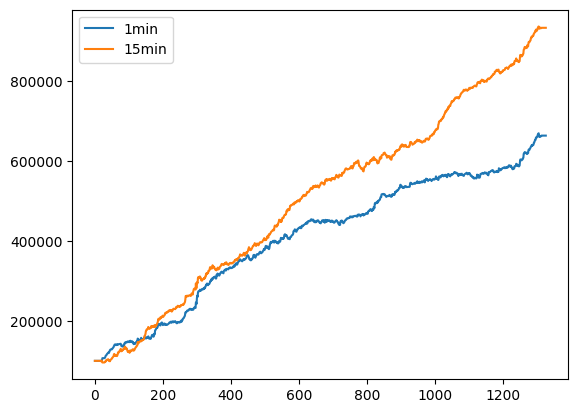

In [114]:
#plot balance comumn from both min1plot and min15plot
plt.plot(min1plot['balance'], label='1min')
plt.plot(min15plot['balance'], label='15min')
plt.legend()
plt.show()


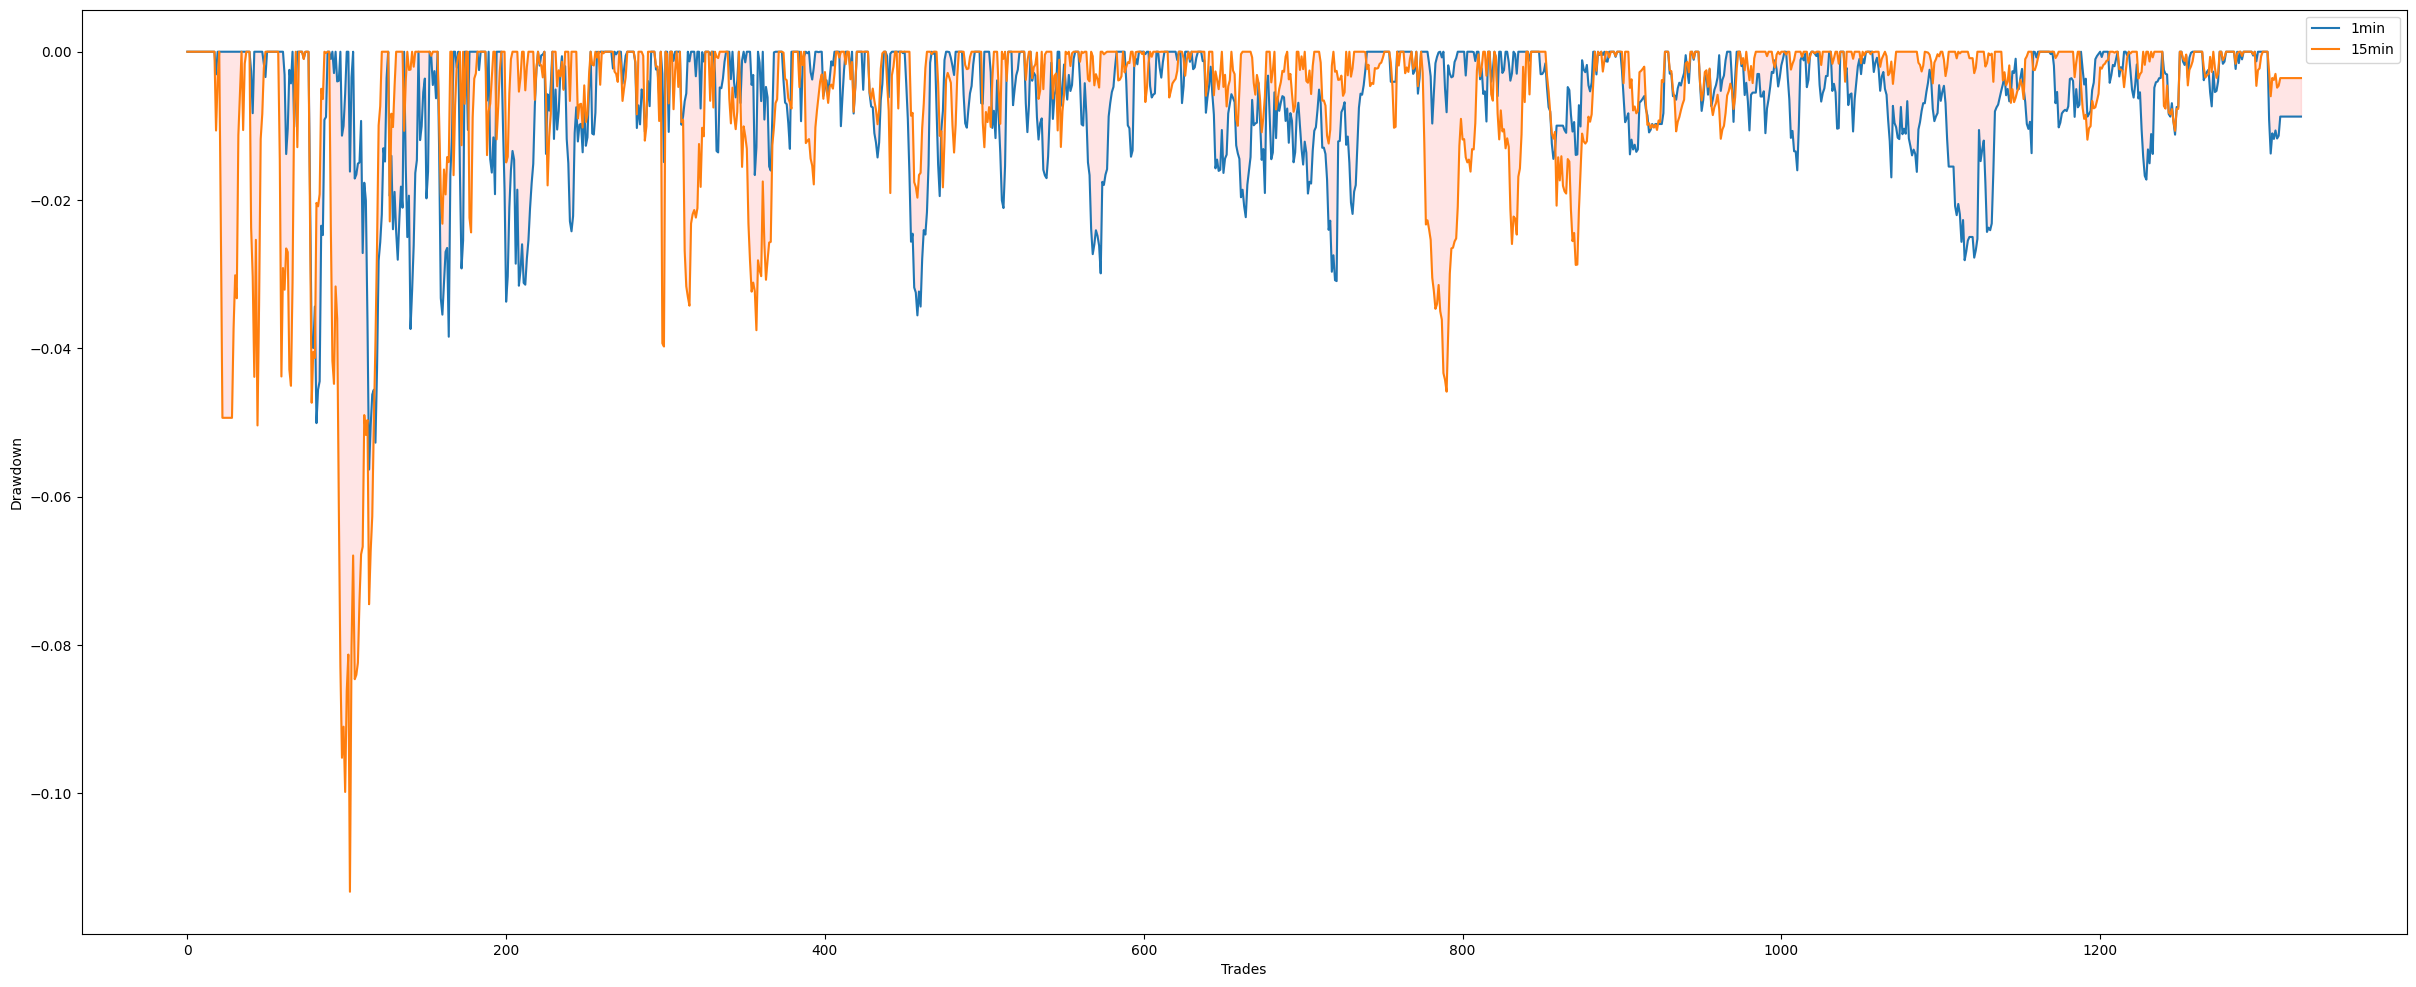

In [165]:
#plot underwater drawdown chart for both min1plot and min15plot
#make sure to make it big enough to see the difference 


plt.figure(figsize=(30,12))
plt.plot(min1plot['balance'].div(min1plot['balance'].cummax()).sub(1), label='1min')
plt.plot(min15plot['balance'].div(min15plot['balance'].cummax()).sub(1), label='15min')
#add fill color between the two lines
plt.fill_between(min1plot.index, min1plot['balance'].div(min1plot['balance'].cummax()).sub(1), min15plot['balance'].div(min15plot['balance'].cummax()).sub(1), color='red', alpha=0.1)
plt.xlabel('Trades')
plt.ylabel('Drawdown')
plt.legend()
plt.show()
